In [69]:
import numpy as np
import struct
from matplotlib import pyplot as plt

In [171]:
LAB_target = (36.62, -20.74, -2.87)
LAB = (36.61, -20.75, -2.86)
dLAB = (-0.01, -0.01, 0.02)

communication = [
# Connected
'aa0a0000005600190353443638373042363637000000000000000000000000000000000000000043523330000000000000000000000000000000ff6e', # R
'aa0a0100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffb4', # W
'aa0a0100000000000000000000000000000000434d3434334c3037383700000000000000000000000000000000000000005631312e332e000000ff48',
'aa0a0200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffb5', # W
'aa0a020000302e302e32303233313231390000000000000000000000005631302e302e302e300000000000000000000000000000000000000000ffd6',
'aa0a0300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffb6', # W
'aa0a0300000000000000000000000000000000020000000000000000000000000000000000000000000000000000000000000000000000000000ffb8',
'bb170000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffd1', # W
'bb170000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffd1',
'bb130000000000000000000000436865636b00000000000000000000000000000000000000000000000000000000000000000000000000000000ffab', # W
'bb13000000254fea68684fea68436865636b00000000000000000000000000000000000000000000000000000000000000000000000000000000ff7a',
'bb280000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe2', # W
'bb280000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe2',
'bb280001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe3', # W
'bb280001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe3',
'bb280002000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe4', # W
'bb280002000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe4',
'bb280003000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe5', # W
'bb280003000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe5',
'bb280004000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe6', # W
'bb280004000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe6',
'bb2800ff000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe1', # W
'bb2800ff000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffe1',

 # Measure
'bb010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffbb', # W
'bb010900281f0a000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ff15', # R
'bb011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffcb', # W
'bb0110000000a468b040b174e64086130141f49c094199031341bbd81e41b94b2b4175693941648049411fb159418b716641168c684100000000ff37', # R
'bb011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffcc', # W
'bb0111000000ef595d41350a4841fe333041c42c1941c61e05415d00ea404aabcd403587ae40c45b9340486b874061768b40658f8d4000000000ff92', # R
'bb011200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffcd', # W
'bb01120000001bb68a40f2278a409ee68c4090589340567b9a407a07a1400260a640000000000000000000000000000000000000000000000000ffab', # R
'bb011300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ffce', # W
'bb011300000000000000000000000000000000000000000000000000000000000000a468b040b174e64086130141f49c09419903134100000000ffba', # R
]

packets = [bytes.fromhex(hex_string) for hex_string in communication]

In [172]:
payloads = [i[4:-2] for i in packets]
[i.hex() for i in payloads]

['005600190353443638373042363637000000000000000000000000000000000000000043523330000000000000000000000000000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000000000434d3434334c3037383700000000000000000000000000000000000000005631312e332e000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00302e302e32303233313231390000000000000000000000005631302e302e302e300000000000000000000000000000000000000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000000000020000000000000000000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [173]:
responses = [v for i, v in enumerate(payloads) if not i%2]
[i.hex() for i in responses]

['005600190353443638373042363637000000000000000000000000000000000000000043523330000000000000000000000000000000',
 '000000000000000000000000000000434d3434334c3037383700000000000000000000000000000000000000005631312e332e000000',
 '00302e302e32303233313231390000000000000000000000005631302e302e302e300000000000000000000000000000000000000000',
 '000000000000000000000000000000020000000000000000000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00254fea68684fea68436865636b00000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [184]:
[i for i in responses[:6]]

[b'\x00V\x00\x19\x03SD6870B667\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00CR30\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00CM443L0787\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00V11.3.\x00\x00\x00',
 b'\x000.0.20231219\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00V10.0.0.0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00%O\xeahhO\xeahCheck\x00\x00\x00\x00\x00

In [183]:
readings = responses[-5:]
a = readings[1][2:-4]
b = readings[2][2:-4]
c = readings[3][2:-4]
[i.hex() for i in readings]
list(struct.unpack(f"f", readings[0][:4]))

[9.295317181313669e-40]

In [74]:
a_floats = list(struct.unpack(f"<{len(a)//4}f", a))
b_floats = list(struct.unpack(f"<{len(b)//4}f", b))
c_floats = list(struct.unpack(f"<{len(c)//4}f", c))
floats = (a_floats + b_floats + c_floats)
floats, len(floats)

([5.512773513793945,
  7.201744556427002,
  8.067266464233398,
  8.600818634033203,
  9.18837833404541,
  9.927912712097168,
  10.705986976623535,
  11.58824634552002,
  12.59384536743164,
  13.605742454528809,
  14.40272045135498,
  14.534200668334961,
  13.834456443786621,
  12.50249195098877,
  11.012693405151367,
  9.573429107666016,
  8.320013046264648,
  7.312544345855713,
  6.427159309387207,
  5.454004764556885,
  4.604951858520508,
  4.231845855712891,
  4.358200550079346,
  4.4237542152404785,
  4.3347296714782715,
  4.317376136779785,
  4.403151512145996,
  4.604560852050781,
  4.8275556564331055,
  5.032162666320801,
  5.199219703674316,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 36)

In [75]:
wavelengths = [400+i*(700-400)/30.0 for i in range(31)]

spd = floats[:31]

spds = [
  {
    "LAB": [77.77,68.59,39.4],
    "SPD": [17.180952072143555, 21.955293655395508, 23.535581588745117, 23.898427963256836, 23.30441665649414, 23.15403175354004, 23.656957626342773, 24.614757537841797, 24.712610244750977, 22.19900131225586, 18.11726188659668, 14.16519546508789, 10.539053916931152, 6.648414134979248, 5.761203289031982, 12.976861000061035, 27.517276763916016, 50.46492004394531, 88.36058807373047, 135.19223022460938, 165.1352996826172, 165.7974853515625, 148.69451904296875, 130.1623992919922, 116.8099136352539, 107.09515380859375, 99.15723419189453, 95.44196319580078, 95.362548828125, 97.0391616821289, 100.17365264892578]
  },
  {
    "LAB": [94.77,-21.06,75.27],
    "SPD": [12.567733764648438, 14.387170791625977, 14.949334144592285, 14.073362350463867, 11.897355079650879, 12.145124435424805, 16.8687801361084, 25.229473114013672, 37.675106048583984, 54.553279876708984, 74.28650665283203, 93.42936706542969, 105.80400085449219, 111.53778076171875, 109.79427337646484, 105.29646301269531, 97.67935943603516, 91.34756469726562, 87.81027221679688, 87.99266815185547, 88.89205169677734, 89.01248931884766, 89.27753448486328, 88.6020278930664, 86.75908660888672, 85.03485107421875, 83.5748519897461, 83.69290161132812, 84.84528350830078, 86.18856048583984, 87.56346130371094]
  },
  {
    "LAB": [30.57,-6.09,-49.07],
    "SPD": [0.0, 1.6630793809890747, 6.584780216217041, 13.707263946533203, 24.877330780029297, 34.19121551513672, 37.345027923583984, 36.9126091003418, 33.529205322265625, 27.4881591796875, 20.151046752929688, 13.055499076843262, 7.297297477722168, 3.8680264949798584, 2.299462080001831, 1.1366851329803467, 0.30736032128334045, 0.29125112295150757, 1.0660878419876099, 1.718971848487854, 0.8910048007965088, 0.008038442581892014, 0.3875650465488434, 0.7629326581954956, 0.8622304201126099, 1.1714918613433838, 1.5497725009918213, 1.4481699466705322, 0.8264680504798889, 0.4876132905483246, 0.49265021085739136]
  },
]

spd

[5.512773513793945,
 7.201744556427002,
 8.067266464233398,
 8.600818634033203,
 9.18837833404541,
 9.927912712097168,
 10.705986976623535,
 11.58824634552002,
 12.59384536743164,
 13.605742454528809,
 14.40272045135498,
 14.534200668334961,
 13.834456443786621,
 12.50249195098877,
 11.012693405151367,
 9.573429107666016,
 8.320013046264648,
 7.312544345855713,
 6.427159309387207,
 5.454004764556885,
 4.604951858520508,
 4.231845855712891,
 4.358200550079346,
 4.4237542152404785,
 4.3347296714782715,
 4.317376136779785,
 4.403151512145996,
 4.604560852050781,
 4.8275556564331055,
 5.032162666320801,
 5.199219703674316]

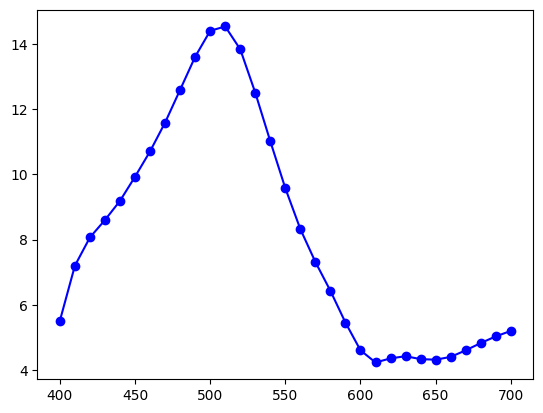

In [76]:
plt.plot(wavelengths, spd, marker='o', linestyle='-', color='blue', label='My Data')
plt.show()

In [158]:
# File loading methods
def load_csv(path):
    with open(path) as f:
        return [
            [float(j) if j != "NaN" else 0.0 for j in i.strip().split(",")]
            for i in f.readlines()
            if len(i) > 2
        ]

def load_illuminant(path):
    """Returns dict with wavelengths and values"""
    data = load_csv(path)
    return {
        'wavelengths': np.array([i[0] for i in data]),
        'values': np.array([i[1] for i in data])
    }

def load_observer(path):
    """Returns dict with wavelengths and CMF values"""
    data = load_csv(path)
    return {
        "wavelengths": np.array([i[0] for i in data]),
        "x_bar": np.array([i[1] for i in data]),
        "y_bar": np.array([i[2] for i in data]),
        "z_bar": np.array([i[3] for i in data]),
    }

cmf_10 = load_observer("CIE_xyz_1964_10deg.csv")
cmf_d65 = load_illuminant("CIE_std_illum_D65.csv")

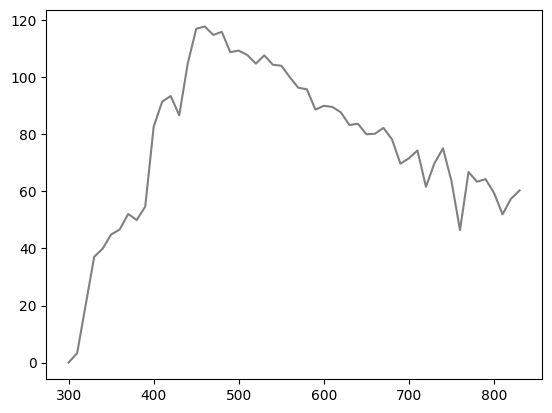

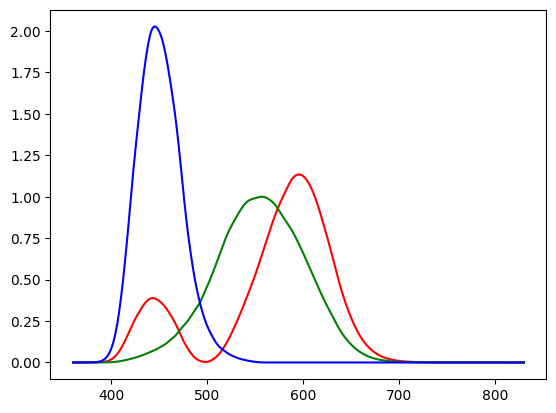

In [161]:
plt.plot(cmf_d65["wavelengths"], cmf_d65["values"], linestyle='-', color='gray', label='D65')
plt.show()

plt.plot(cmf_10["wavelengths"], cmf_10["x_bar"], linestyle='-', color='red', label='10 X')
plt.plot(cmf_10["wavelengths"], cmf_10["y_bar"], linestyle='-', color='green', label='10 Y')
plt.plot(cmf_10["wavelengths"], cmf_10["z_bar"], linestyle='-', color='blue', label='10 Z')
plt.show()


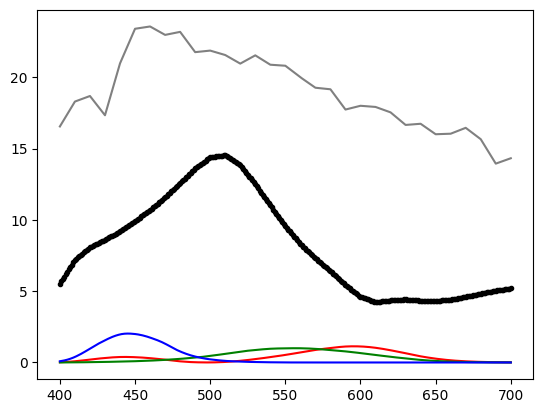

In [162]:
def interpolate_to_unit_step(X, Y):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)

    # Original step
    d = X[1] - X[0]

    # New starting point
    X0_new = round(X[0] - d/2)

    # New ending point
    X1_new = round(X[-1] + d/2)

    # Generate X' with step 1
    X_new = np.arange(X0_new, X1_new + 1, 1)

    # Linear interpolation for Y'
    Y_new = np.interp(X_new, X, Y)

    return X_new, Y_new

def upscale_interpolate(X, Xp, Yp):
    """
    Interpolates low-resolution data (Xp, Yp) onto a new
    high-resolution X grid using linear interpolation.
    """
    X  = np.array(X, dtype=float)
    Xp = np.array(Xp, dtype=float)
    Yp = np.array(Yp, dtype=float)

    # Use np.interp for linear interpolation
    Y = np.interp(X, Xp, Yp)

    return Y    

def restrict_to_X_range(X, Xp, Yp):
    """
    Restricts Xp and Yp to lie within the min/max of X.
    Removes all points outside [min(X), max(X)].
    """
    X  = np.array(X,  dtype=float)
    Xp = np.array(Xp, dtype=float)
    Yp = np.array(Yp, dtype=float)

    Xmin, Xmax = np.min(X), np.max(X)

    # Keep only points within the range
    mask = (Xp >= Xmin) & (Xp <= Xmax)

    return Xp[mask], Yp[mask]

# wavelengths_interp, spd_interp = interpolate_to_unit_step(wavelengths, spd)

cmf_d65["wavelengths"], cmf_d65["values"] = restrict_to_X_range(wavelengths, cmf_d65["wavelengths"], cmf_d65["values"])
_wavelengths_10, cmf_10["x_bar"] = restrict_to_X_range(wavelengths, cmf_10["wavelengths"], cmf_10["x_bar"])
_wavelengths_10, cmf_10["y_bar"] = restrict_to_X_range(wavelengths, cmf_10["wavelengths"], cmf_10["y_bar"])
_wavelengths_10, cmf_10["z_bar"] = restrict_to_X_range(wavelengths, cmf_10["wavelengths"], cmf_10["z_bar"])
cmf_10["wavelengths"] = _wavelengths_10

wavelengths_interp = cmf_d65["wavelengths"]
spd_interp = upscale_interpolate(wavelengths_interp, wavelengths, spd)

plt.plot(wavelengths_interp, spd_interp, marker='.', linestyle='-', color='black', label='interpolated sp')

plt.plot(cmf_d65["wavelengths"], cmf_d65["values"]/5, linestyle='-', color='gray', label='10 X')
plt.plot(cmf_10["wavelengths"], cmf_10["x_bar"], linestyle='-', color='red', label='10 X')
plt.plot(cmf_10["wavelengths"], cmf_10["y_bar"], linestyle='-', color='green', label='10 Y')
plt.plot(cmf_10["wavelengths"], cmf_10["z_bar"], linestyle='-', color='blue', label='10 Z')
plt.show()

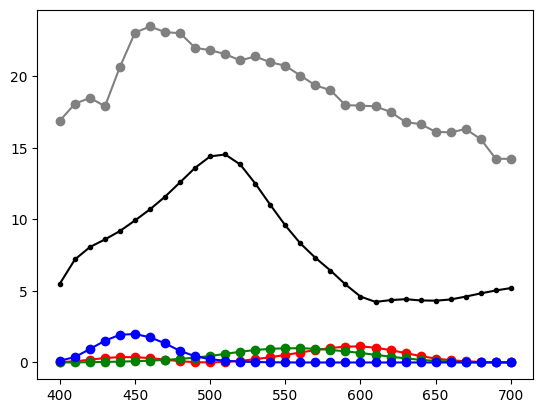

In [164]:
def downsample_by_averaging(X, Xp, Yp):
    X = np.array(X, dtype=float)
    Xp = np.array(Xp, dtype=float)
    Yp = np.array(Yp, dtype=float)

    d = X[1] - X[0]  # original uniform step
    Y = np.zeros_like(X)

    for i, Xi in enumerate(X):
        left  = Xi - d/2
        right = Xi + d/2

        # mask for values within this bin
        mask = (Xp >= left) & (Xp < right)

        # average the selected Y' values
        if np.any(mask):
            Y[i] = np.mean(Yp[mask])
        else:
            Y[i] = np.nan  # or choose 0, or carry last value, etc.

    return Y

def downsample_nearest(X, Xp, Yp):
    X  = np.array(X, dtype=float)
    Xp = np.array(Xp, dtype=float)
    Yp = np.array(Yp, dtype=float)

    Y = np.zeros_like(X)

    for i, Xi in enumerate(X):
        # Find index of closest X'
        idx = np.argmin(np.abs(Xp - Xi))
        Y[i] = Yp[idx]

    return Y

cmf_10_nearest = {
    "wavelengths": wavelengths,
    "x_bar": downsample_nearest(wavelengths, cmf_10["wavelengths"], cmf_10["x_bar"]),
    "y_bar": downsample_nearest(wavelengths, cmf_10["wavelengths"], cmf_10["y_bar"]),
    "z_bar": downsample_nearest(wavelengths, cmf_10["wavelengths"], cmf_10["z_bar"]),
}

cmf_d65_nearest = {
    "wavelengths": wavelengths,
    "values": downsample_nearest(wavelengths, cmf_d65["wavelengths"], cmf_d65["values"]),
}

cmf_10_downsample = {
    "wavelengths": wavelengths,
    "x_bar": downsample_by_averaging(wavelengths, cmf_10["wavelengths"], cmf_10["x_bar"]),
    "y_bar": downsample_by_averaging(wavelengths, cmf_10["wavelengths"], cmf_10["y_bar"]),
    "z_bar": downsample_by_averaging(wavelengths, cmf_10["wavelengths"], cmf_10["z_bar"]),
}

cmf_d65_downsample = {
    "wavelengths": wavelengths,
    "values": downsample_by_averaging(wavelengths, cmf_d65["wavelengths"], cmf_d65["values"]),
}

plt.plot(wavelengths, spd, marker='.', linestyle='-', color='black', label='interpolated sp')

plt.plot(cmf_d65_downsample["wavelengths"], cmf_d65_downsample["values"]/5, marker='o', linestyle='-', color='gray', label='10 X')
plt.plot(cmf_10_downsample["wavelengths"], cmf_10_downsample["x_bar"], marker='o', linestyle='-', color='red', label='10 X')
plt.plot(cmf_10_downsample["wavelengths"], cmf_10_downsample["y_bar"], marker='o', linestyle='-', color='green', label='10 Y')
plt.plot(cmf_10_downsample["wavelengths"], cmf_10_downsample["z_bar"], marker='o', linestyle='-', color='blue', label='10 Z')
plt.show()

In [143]:
def spectrum_to_xyz(wavelengths, spd, cmf_x, cmf_y, cmf_z, illuminant=None):
    """
    Convert a spectral power distribution to CIE XYZ tristimulus values.
    
    Parameters:
    -----------
    wavelengths : array-like
        Wavelength values in nm
    spd : array-like
        Spectral power distribution values (reflectance for reflective objects, 
        or emission spectrum for light sources)
    cmf_x, cmf_y, cmf_z : array-like
        CIE color matching functions (x̄, ȳ, z̄) at the same wavelengths
    illuminant : array-like, optional
        Illuminant spectral power distribution (e.g., D65) at the same wavelengths.
        If None, assumes spd is an emissive spectrum (light source).
        If provided, assumes spd is a reflectance spectrum.
    
    Returns:
    --------
    tuple : (X, Y, Z)
        CIE XYZ tristimulus values, normalized so that Y=100 for a perfect 
        white reflector or reference white point.
    """
    
    # Convert to numpy arrays
    wavelengths = np.array(wavelengths)
    spd = np.array(spd) / 100
    cmf_x = np.array(cmf_x)
    cmf_y = np.array(cmf_y)
    cmf_z = np.array(cmf_z)
    
    # Calculate wavelength interval (assuming uniform spacing)
    if len(wavelengths) > 1:
        delta_lambda = wavelengths[1] - wavelengths[0]
    else:
        delta_lambda = 1.0
    
    # Case 1: Reflective object (illuminant provided)
    if illuminant is not None:
        illuminant = np.array(illuminant)
        
        # Calculate normalization constant k
        # k = 100 / Σ[S(λ) × ȳ(λ) × Δλ]
        k = 100.0 / np.sum(illuminant * cmf_y * delta_lambda)
        
        # Calculate XYZ values
        # X = k × Σ[S(λ) × R(λ) × x̄(λ) × Δλ]
        X = k * np.sum(illuminant * spd * cmf_x * delta_lambda)
        Y = k * np.sum(illuminant * spd * cmf_y * delta_lambda)
        Z = k * np.sum(illuminant * spd * cmf_z * delta_lambda)
    
    # Case 2: Emissive spectrum (no illuminant)
    else:
        # Calculate normalization constant k
        # k = 100 / Σ[E(λ) × ȳ(λ) × Δλ]
        k = 100.0 / np.sum(spd * cmf_y * delta_lambda)
        
        # Calculate XYZ values
        # X = k × Σ[E(λ) × x̄(λ) × Δλ]
        X = k * np.sum(spd * cmf_x * delta_lambda)
        Y = k * np.sum(spd * cmf_y * delta_lambda)
        Z = k * np.sum(spd * cmf_z * delta_lambda)
    
    # inferred corrections
    # X *= 0.997949
    # Y *= 0.997800
    # Z *= 0.997643

    return X, Y, Z

xyz = spectrum_to_xyz(wavelengths, spd, cmf_10_downsample["x_bar"], cmf_10_downsample["y_bar"], cmf_10_downsample["z_bar"], illuminant=cmf_d65_downsample["values"])
xyz

(np.float64(6.616921766992594),
 np.float64(9.29665445066868),
 np.float64(11.01325714105231))

In [137]:
def xyz_to_lab(X, Y, Z, reference_white='D65/10'):
    """
    Convert CIE XYZ to CIE LAB color space.
    
    Parameters:
    -----------
    X, Y, Z : float
        CIE XYZ tristimulus values
    reference_white : str or tuple, optional
        Reference white point. Default is 'D65' which uses D65/10° values.
        Can also pass a tuple of (Xn, Yn, Zn) values directly.
    
    Returns:
    --------
    tuple : (L, a, b)
        CIE LAB values
    """
    
    if reference_white == 'D65/10' or reference_white == 'D65':
        Xn, Yn, Zn = 94.81, 100.00, 107.32
    elif reference_white == 'D50/10' or reference_white == 'D50':
        Xn, Yn, Zn = 96.72, 100.00, 81.43
    elif reference_white == 'D65/2':
        Xn, Yn, Zn = 95.04, 100.00, 108.88
    elif reference_white == 'D50/2':
        Xn, Yn, Zn = 96.42, 100.00, 82.51
    elif isinstance(reference_white, (tuple, list)):
        Xn, Yn, Zn = reference_white
    else:
        raise ValueError("reference_white must be 'D65' or a tuple of (Xn, Yn, Zn)")
    
    # Normalize by reference white
    xr = X / Xn
    yr = Y / Yn
    zr = Z / Zn
    
    # Apply the f(t) function
    def f(t):
        delta = 6/29
        if t > delta**3:
            return np.cbrt(t)
        else:
            return t / (3 * delta**2) + 4/29
    
    # Vectorized version for arrays
    def f_vectorized(t):
        delta = 6/29
        return np.where(t > delta**3, 
                       np.cbrt(t), 
                       t / (3 * delta**2) + 4/29)
    
    # Use vectorized version if inputs are arrays, otherwise use scalar version
    if isinstance(xr, np.ndarray):
        fx = f_vectorized(xr)
        fy = f_vectorized(yr)
        fz = f_vectorized(zr)
    else:
        fx = f(xr)
        fy = f(yr)
        fz = f(zr)
    
    # Calculate LAB values
    L = 116 * fy - 16
    a = 500 * (fx - fy)
    b = 200 * (fy - fz)
    
    return L, a, b

lab = xyz_to_lab(*xyz)
lab, LAB

((np.float64(36.54929398346584),
  np.float64(-20.646215682091213),
  np.float64(-3.033520580986948)),
 (36.61, -20.75, -2.86))

In [83]:
print("expected LAB", LAB)
print("spd", spd)
print("wavelengths", wavelengths)
print("d65", cmf_d65_downsample["values"])
print("obs 10 x_bar", cmf_10_downsample["x_bar"])
print("obs 10 y_bar", cmf_10_downsample["y_bar"])
print("obs 10 z_bar", cmf_10_downsample["z_bar"])
print("Calculated XYZ", xyz)
print("Calculated LAB", lab)


expected LAB (36.61, -20.75, -2.86)
spd [5.512773513793945, 7.201744556427002, 8.067266464233398, 8.600818634033203, 9.18837833404541, 9.927912712097168, 10.705986976623535, 11.58824634552002, 12.59384536743164, 13.605742454528809, 14.40272045135498, 14.534200668334961, 13.834456443786621, 12.50249195098877, 11.012693405151367, 9.573429107666016, 8.320013046264648, 7.312544345855713, 6.427159309387207, 5.454004764556885, 4.604951858520508, 4.231845855712891, 4.358200550079346, 4.4237542152404785, 4.3347296714782715, 4.317376136779785, 4.403151512145996, 4.604560852050781, 4.8275556564331055, 5.032162666320801, 5.199219703674316]
wavelengths [400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0]
d65 [ 79.41199  90.37092  92.46497  89.51298 103.35187 115.2669  117.3964
 115.4097  115.0525  109.9321  109.1173  107.7336  105.5318

In [91]:
print("wavelengths", wavelengths)
print("d65", cmf_d65_downsample["values"])
print("obs 10 x_bar", cmf_10_downsample["x_bar"])
print("obs 10 y_bar", cmf_10_downsample["y_bar"])
print("obs 10 z_bar", cmf_10_downsample["z_bar"])
print("d65 nearest", cmf_d65_nearest["values"])
print("obs 10 x_bar nearest", cmf_10_nearest["x_bar"])
print("obs 10 y_bar nearest", cmf_10_nearest["y_bar"])
print("obs 10 z_bar nearest", cmf_10_nearest["z_bar"])
for test in spds:
  _xyz = spectrum_to_xyz(wavelengths, test["SPD"], cmf_10_downsample["x_bar"], cmf_10_downsample["y_bar"], cmf_10_downsample["z_bar"], illuminant=cmf_d65_downsample["values"])
  _lab = xyz_to_lab(*_xyz)

  n_xyz = spectrum_to_xyz(wavelengths, test["SPD"], cmf_10_nearest["x_bar"], cmf_10_nearest["y_bar"], cmf_10_nearest["z_bar"], illuminant=cmf_d65_nearest["values"])
  n_lab = xyz_to_lab(*n_xyz)

  print("expected LAB", test["LAB"])
  print(" spd", test["SPD"])
  print(" Calculated XYZ", [float(i) for i in _xyz])
  print(" Calculated LAB", [float(i) for i in _lab])
  print(" Calculated XYZ nearest", [float(i) for i in n_xyz])
  print(" Calculated LAB nearest", [float(i) for i in n_lab])


wavelengths [400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0]
d65 [ 79.41199  90.37092  92.46497  89.51298 103.35187 115.2669  117.3964
 115.4097  115.0525  109.9321  109.1173  107.7336  105.5318  106.9256
 104.8616  103.6953  100.24032  96.82945  95.15969  89.88302  89.76741
  89.47011  87.54276  83.99116  83.27037  80.59644  80.39275  81.56896
  78.02694  71.19452  71.59993]
obs 10 x_bar [0.01941566 0.0823819  0.1976865  0.3090404  0.3782872  0.3709892
 0.3055699  0.2009222  0.0870881  0.0203548  0.0055694  0.0366788
 0.1141005  0.2305795  0.3697542  0.5230565  0.6962194  0.8685873
 1.0077373  1.110552   1.122089   1.033755   0.8649897  0.6574867
 0.4438837  0.2771999  0.1591098  0.08526276 0.04313958 0.02111813
 0.01015757]
obs 10 y_bar [0.00203337 0.0085078  0.020848   0.0379872  0.0608175  0.0881871
 0.1261901  0.18

In [85]:
def diagnose_colorimeter_differences(reference_measurements, wavelengths, cmf_x, 
                                     cmf_y, cmf_z, illuminant, spd_is_percentage=False):
    """
    Analyze the differences between your calculations and colorimeter readings
    to identify systematic issues.
    
    Parameters:
    -----------
    reference_measurements : list of tuples
        List of (expected_lab, spd) tuples
    wavelengths, cmf_x, cmf_y, cmf_z, illuminant : array-like
        Color matching data
    spd_is_percentage : bool
        Whether SPD values are in percentage
    
    Returns:
    --------
    dict : Diagnostic information about the differences
    """
    results = []
    
    for expected_lab, spd in reference_measurements:
        # Calculate with current method
        X, Y, Z = spectrum_to_xyz(wavelengths, spd, cmf_x, cmf_y, cmf_z,
                                  illuminant)
        calc_L, calc_a, calc_b = xyz_to_lab(X, Y, Z)
        
        # Calculate errors
        dL = calc_L - expected_lab[0]
        da = calc_a - expected_lab[1]
        db = calc_b - expected_lab[2]
        delta_e = np.sqrt(dL**2 + da**2 + db**2)
        
        results.append({
            'expected_lab': expected_lab,
            'calculated_lab': (calc_L, calc_a, calc_b),
            'xyz': (X, Y, Z),
            'errors': (dL, da, db),
            'delta_e': delta_e,
            'spd_max': np.max(spd),
            'spd_mean': np.mean(spd)
        })
    
    # Analyze patterns
    all_dL = [r['errors'][0] for r in results]
    all_da = [r['errors'][1] for r in results]
    all_db = [r['errors'][2] for r in results]
    all_delta_e = [r['delta_e'] for r in results]
    
    return {
        'samples': results,
        'mean_dL': np.mean(all_dL),
        'mean_da': np.mean(all_da),
        'mean_db': np.mean(all_db),
        'mean_delta_e': np.mean(all_delta_e),
        'max_delta_e': np.max(all_delta_e),
        'std_dL': np.std(all_dL),
        'std_da': np.std(all_da),
        'std_db': np.std(all_db),
    }

reference_measurements = [
    ([77.77, 68.59, 39.4], spds[0]["SPD"]),
    ([94.77, -21.06, 75.27], spds[1]["SPD"]),
    ([30.57, -6.09, -49.07], spds[2]["SPD"]),
]

diagnosis = diagnose_colorimeter_differences(reference_measurements, wavelengths,
                                            cmf_10_downsample["x_bar"], cmf_10_downsample["y_bar"], cmf_10_downsample["z_bar"], cmf_d65_downsample["values"],
                                            )
print(f"Mean ΔE: {diagnosis['mean_delta_e']:.2f}")
print(f"Mean ΔL*: {diagnosis['mean_dL']:.2f}")
print(f"Mean Δa*: {diagnosis['mean_da']:.2f}")
print(f"Mean Δb*: {diagnosis['mean_db']:.2f}")

Mean ΔE: 1.66
Mean ΔL*: 0.43
Mean Δa*: -0.22
Mean Δb*: -0.90


In [92]:
test_samples = [
    (81.48, 87.12, 93.35, (94.79, -2.18, 0.10)),  # Sample 1
    (14.82, 21.43, 38.81, (53.41, -29.82, -22.81)),  # Sample 7
    (4.21, 2.96, 19.56, (19.90, 22.34, -51.50)),  # Sample 12
]

for X, Y, Z, expected in test_samples:
    L, a, b = xyz_to_lab(X, Y, Z)
    dE = np.sqrt((L-expected[0])**2 + (a-expected[1])**2 + (b-expected[2])**2)
    print(f"XYZ({X}, {Y}, {Z})")
    print(f"  Expected: ({expected[0]}, {expected[1]}, {expected[2]})")
    print(f"  Got:      ({L:.2f}, {a:.2f}, {b:.2f})")
    print(f"  ΔE: {dE:.2f}\n")

XYZ(81.48, 87.12, 93.35)
  Expected: (94.79, -2.18, 0.1)
  Got:      (94.79, -2.17, 0.09)
  ΔE: 0.02

XYZ(14.82, 21.43, 38.81)
  Expected: (53.41, -29.82, -22.81)
  Got:      (53.42, -29.87, -22.81)
  ΔE: 0.05

XYZ(4.21, 2.96, 19.56)
  Expected: (19.9, 22.34, -51.5)
  Got:      (19.88, 22.39, -51.53)
  ΔE: 0.06



In [96]:
# 24 patches via software:
# LAB, XYZ
software = [
  [(94.79, -2.18, 0.10), (81.48, 87.12, 93.35)],
  [(82.19, -2.93, 4.67), (56.31, 60.64, 59.84)],
  [(67.50, -1.80, 3.32), (34.84, 37.30, 37.33)],
  [(49.38, 1.15, 0.42), (17.18, 17.90, 19.00)],
  [(31.51, -1.19, -0.25), (6.40, 6.87, 7.44)],
  [(14.32, -6.56, -3.91), (1.45, 1.79, 2.38)],
  [(53.41, -29.82, -22.81), (14.82, 21.43, 38.81)],
  [(50.35, 48.11, -10.25), (28.28, 18.71, 25.97)],
  [(81.65, 0.08, 83.04), (56.59, 59.65, 8.33)],
  [(35.95, 56.24, 44.27), (16.68, 8.98, 1.25)],
  [(55.84, -38.51, 43.59), (15.12, 23.76, 6.94)],
  [(19.90, 22.34, -51.50), (4.21, 2.96, 19.56)],
  [(57.82, 33.39, 60.55), (32.97, 25.78, 3.99)],
  [(39.35, 2.04, -41.44), (10.56, 10.86, 34.39)],
  [(46.14, 47.99, 14.80), (23.90, 15.37, 10.56)],
  [(23.53, 29.22, -33.74), (6.03, 3.96, 14.19)],
  [(69.83, -19.84, 65.21), (32.55, 40.50, 7.61)],
  [(67.06, 22.06, 68.70), (41.65, 36.71, 5.55)],
  [(71.91, -36.49, 5.28), (30.46, 43.53, 42.00)],
  [(55.23, 5.12, -26.96), (23.07, 23.15, 45.07)],
  [(41.96, -19.16, 28.83), (9.31, 12.47, 4.82)],
  [(51.88, -4.21, -23.14), (18.19, 20.04, 36.95)],
  [(65.09, 11.65, 18.77), (35.74, 34.16, 23.79)],
  [(29.99, 15.97, 20.68), (7.46, 6.23, 2.70)],
]

reverse_engineered_spd = [
  {'LAB': [94.42, -2.09, 0.25], 'SPD': [55.28138732910156, 63.344505310058594, 69.52454376220703, 75.96088409423828, 84.39344787597656, 91.21277618408203, 94.03691101074219, 93.96580505371094, 92.2179183959961, 89.6288833618164, 87.10913848876953, 86.24519348144531, 86.83333587646484, 88.19606018066406, 88.75723266601562, 87.40884399414062, 85.43611145019531, 84.26840209960938, 84.56645202636719, 86.09268951416016, 86.34684753417969, 85.4700927734375, 85.07050323486328, 84.85047149658203, 84.81207275390625, 85.62571716308594, 86.11259460449219, 86.30834197998047, 85.8306655883789, 85.49370574951172, 85.34911346435547]}, 
  {'LAB': [81.9, -2.4, 4.89], 'SPD': [33.698726654052734, 42.011390686035156, 46.31901931762695, 48.819271087646484, 51.30421447753906, 54.405887603759766, 58.18791198730469, 62.568641662597656, 67.04041290283203, 70.1972427368164, 70.44830322265625, 67.47594451904297, 62.223384857177734, 57.110260009765625, 54.755165100097656, 55.444610595703125, 57.887908935546875, 60.986061096191406, 63.41130065917969, 64.12222290039062, 62.94365310668945, 62.10122299194336, 62.45098876953125, 62.15528869628906, 61.77189254760742, 62.689064025878906, 64.23867797851562, 66.75041961669922, 69.61795806884766, 72.5309829711914, 75.42794036865234]}, 
  {'LAB': [67.33, -1.97, 2.98], 'SPD': [20.17399787902832, 26.78388214111328, 29.70057487487793, 30.650602340698242, 31.074054718017578, 32.537899017333984, 35.673240661621094, 40.053977966308594, 44.82624816894531, 48.22848892211914, 48.42289733886719, 44.629817962646484, 38.119197845458984, 31.89627456665039, 29.103069305419922, 30.260377883911133, 33.63084411621094, 37.55007553100586, 40.39116668701172, 40.86513137817383, 39.3414421081543, 38.23213577270508, 38.0585823059082, 37.280487060546875, 36.759002685546875, 37.72910690307617, 39.78102493286133, 43.088722229003906, 47.02479553222656, 50.942787170410156, 54.749542236328125]}, 
  {'LAB': [49.4, 0.95, 0.06], 'SPD': [10.371477127075195, 14.352340698242188, 15.929838180541992, 16.02495765686035, 15.517635345458984, 15.926816940307617, 17.920949935913086, 20.981908798217773, 24.37388801574707, 26.710891723632812, 26.59282875061035, 23.320329666137695, 18.004486083984375, 13.072025299072266, 10.901123046875, 11.96453857421875, 14.920790672302246, 18.30469512939453, 20.850278854370117, 21.55857276916504, 20.678335189819336, 19.89937973022461, 19.55229377746582, 18.756567001342773, 18.34436798095703, 19.173675537109375, 21.045761108398438, 24.033729553222656, 27.642961502075195, 31.224430084228516, 34.68317413330078]}, 
  {'LAB': [31.59, -1.09, -0.33], 'SPD': [3.814927101135254, 5.438728332519531, 6.1519575119018555, 5.998451232910156, 5.406736850738525, 5.522038459777832, 6.860803604125977, 8.959556579589844, 11.316786766052246, 13.025404930114746, 13.083576202392578, 10.949280738830566, 7.3878326416015625, 4.046382904052734, 2.4818873405456543, 3.069965124130249, 5.013810634613037, 7.204681873321533, 8.675055503845215, 8.829574584960938, 8.026202201843262, 7.412718296051025, 7.215268135070801, 6.724063873291016, 6.439189434051514, 6.921247482299805, 8.170685768127441, 10.255773544311523, 12.856307983398438, 15.446001052856445, 17.940954208374023]}, 
  {'LAB': [14.27, -6.37, -3.91], 'SPD': [1.2294373512268066, 1.5358251333236694, 1.8005956411361694, 1.7095426321029663, 1.4160993099212646, 1.5003286600112915, 2.1866331100463867, 3.1959805488586426, 4.303617000579834, 5.11521053314209, 5.125114917755127, 4.058358192443848, 2.2984225749969482, 0.6656768918037415, 0.0, 0.061595618724823, 0.9387363195419312, 1.9114990234375, 2.40596866607666, 2.198990821838379, 1.6280248165130615, 1.2720544338226318, 1.2811284065246582, 1.153273344039917, 1.034018635749817, 1.2014148235321045, 1.7289683818817139, 2.676339626312256, 3.9087026119232178, 5.1552815437316895, 6.36517333984375]}, 
  {'LAB': [53.42, -29.85, -22.41], 'SPD': [14.66249942779541, 21.08201026916504, 24.985748291015625, 28.210582733154297, 32.44482421875, 36.72773742675781, 40.09645080566406, 43.167945861816406, 45.6715087890625, 46.56407165527344, 44.80419158935547, 39.93815994262695, 32.708274841308594, 25.2921085357666, 20.033010482788086, 17.18726348876953, 15.903603553771973, 15.269478797912598, 13.962605476379395, 10.752273559570312, 6.868981838226318, 4.847785949707031, 4.964269161224365, 4.908512592315674, 4.7464189529418945, 5.4146952629089355, 6.91772985458374, 9.021621704101562, 11.272106170654297, 13.427934646606445, 15.430879592895508]}, 
  {'LAB': [50.14, 47.94, -10.16], 'SPD': [25.179641723632812, 29.21656036376953, 29.819971084594727, 29.094200134277344, 27.444643020629883, 25.608177185058594, 23.77613067626953, 21.551034927368164, 18.847209930419922, 15.669218063354492, 12.441753387451172, 9.43681812286377, 7.058090686798096, 5.899888038635254, 6.2345757484436035, 7.750667572021484, 9.809389114379883, 13.151185035705566, 19.802928924560547, 30.047119140625, 40.159053802490234, 47.714908599853516, 51.909942626953125, 54.504756927490234, 56.88949203491211, 59.84340286254883, 62.43547058105469, 64.844970703125, 66.92512512207031, 69.00452423095703, 71.12809753417969]}, 
  {'LAB': [81.61, 0.16, 82.98], 'SPD': [0.18706560134887695, 1.2314670085906982, 1.9053809642791748, 0.9004899263381958, 0.0, 0.0, 4.578236103057861, 13.367961883544922, 24.911888122558594, 37.54103469848633, 48.469940185546875, 55.069923400878906, 57.350406646728516, 56.82761001586914, 56.491943359375, 58.33137130737305, 62.029563903808594, 66.41699981689453, 70.62737274169922, 74.70584869384766, 77.6500244140625, 80.39325714111328, 83.90831756591797, 85.30029296875, 84.36666870117188, 83.12220764160156, 81.79703521728516, 82.2256851196289, 83.98826599121094, 86.07880401611328, 88.33456420898438]}, 
  {'LAB': [35.96, 55.93, 43.84], 'SPD': [1.655356526374817, 1.36027193069458, 1.2798089981079102, 0.911228597164154, 0.451821506023407, 0.4508117735385895, 0.9923495650291443, 1.6398226022720337, 2.3357441425323486, 3.0711123943328857, 3.3571906089782715, 2.5585098266601562, 1.0794637203216553, 0.025641988962888718, 0.0, 0.4380689263343811, 1.2177108526229858, 2.767714738845825, 6.594720363616943, 13.858973503112793, 23.370731353759766, 34.73647689819336, 45.81772232055664, 53.84598922729492, 58.77040481567383, 62.74778747558594, 65.51564025878906, 67.82485961914062, 69.66436767578125, 71.48052215576172, 73.33077239990234]}, 
  {'LAB': [55.39, -38.39, 42.97], 'SPD': [0.18038684129714966, 1.4667011499404907, 2.2129034996032715, 1.5528160333633423, 0.0, 0.3709949851036072, 4.5277581214904785, 11.386979103088379, 20.20992660522461, 29.399049758911133, 36.300331115722656, 38.48457336425781, 35.97570037841797, 30.7015438079834, 26.074918746948242, 23.979337692260742, 23.83415985107422, 23.985706329345703, 22.645612716674805, 18.90506362915039, 14.644896507263184, 12.550869941711426, 12.658157348632812, 12.146855354309082, 11.1513090133667, 10.913969993591309, 11.849010467529297, 14.446264266967773, 18.149105072021484, 21.778854370117188, 25.161422729492188]}, 
  {'LAB': [19.83, 22.19, -51.21], 'SPD': [11.238384246826172, 14.37407112121582, 15.958534240722656, 17.902515411376953, 20.771631240844727, 22.41188621520996, 21.271636962890625, 18.245119094848633, 13.8565034866333, 8.83324909210205, 4.52150297164917, 1.9680633544921875, 1.2454569339752197, 1.8660420179367065, 2.569350481033325, 2.302903652191162, 1.323075294494629, 0.48658841848373413, 0.44973182678222656, 1.123604655265808, 1.4645507335662842, 0.9488943815231323, 0.0, 0.0, 0.0, 0.5931845307350159, 1.765179991722107, 2.5128300189971924, 2.777026414871216, 3.0610926151275635, 3.41632342338562]}, 
  {'LAB': [57.68, 33.39, 60.38], 'SPD': [0.11132550239562988, 0.8535207509994507, 1.2963272333145142, 0.7201095819473267, 0.0, 0.006226040422916412, 2.756696939468384, 7.073173522949219, 12.265863418579102, 17.10539436340332, 19.904619216918945, 19.295177459716797, 16.081222534179688, 12.515974044799805, 11.19886302947998, 12.990120887756348, 16.840822219848633, 22.22392463684082, 29.95182228088379, 40.228885650634766, 50.511653900146484, 60.2370719909668, 68.7995834350586, 74.0709228515625, 76.26329040527344, 77.56269073486328, 77.94025421142578, 78.93417358398438, 80.42552185058594, 82.14501190185547, 84.04060363769531]}, 
  {'LAB': [39.24, 1.98, -41.32], 'SPD': [17.5324649810791, 22.819738388061523, 25.73448944091797, 28.889272689819336, 33.373146057128906, 36.461082458496094, 36.169151306152344, 33.636024475097656, 29.381757736206055, 23.882064819335938, 18.39411163330078, 13.984482765197754, 11.046333312988281, 9.754688262939453, 9.346720695495605, 8.643465042114258, 7.563923358917236, 6.775265216827393, 6.62211799621582, 6.549911975860596, 5.719778060913086, 4.407893657684326, 2.9868969917297363, 2.1652462482452393, 2.4882187843322754, 3.894850969314575, 5.886909008026123, 7.629356384277344, 8.881404876708984, 10.11358642578125, 11.367668151855469]}, 
  {'LAB': [46.06, 47.84, 14.77], 'SPD': [9.310006141662598, 11.448248863220215, 11.790868759155273, 11.038362503051758, 9.636999130249023, 8.838168144226074, 9.130457878112793, 9.902094841003418, 10.77696704864502, 11.23818588256836, 10.664496421813965, 8.541145324707031, 5.522977828979492, 3.0650365352630615, 2.428506851196289, 3.7515645027160645, 6.266275405883789, 10.02370834350586, 16.367918014526367, 25.721168518066406, 35.509552001953125, 44.5902214050293, 51.8448486328125, 56.581024169921875, 59.524864196777344, 62.27668380737305, 64.38246154785156, 66.55476379394531, 68.67139434814453, 70.83755493164062, 73.0655288696289]}, 
  {'LAB': [23.34, 29.0, -33.45], 'SPD': [12.858929634094238, 15.569673538208008, 16.034292221069336, 15.888324737548828, 15.35282039642334, 14.480762481689453, 13.157364845275879, 11.3010892868042, 8.982064247131348, 6.404582500457764, 4.058019638061523, 2.3346264362335205, 1.3636549711227417, 1.163848638534546, 1.4107108116149902, 1.75120210647583, 2.072699546813965, 2.6109378337860107, 3.8019320964813232, 5.526520729064941, 6.727068901062012, 6.773284435272217, 5.677698612213135, 4.836302280426025, 5.0985941886901855, 6.349114418029785, 8.196102142333984, 10.185159683227539, 12.099206924438477, 13.956366539001465, 15.751273155212402]}, 
  {'LAB': [69.09, -19.59, 64.38], 'SPD': [0.1904836893081665, 1.3420170545578003, 2.0375938415527344, 1.203528881072998, 0.0, 0.0, 4.448428153991699, 12.346223831176758, 22.653650283813477, 33.78153610229492, 43.012779235839844, 47.760990142822266, 47.93449020385742, 45.153076171875, 42.55168533325195, 42.14006423950195, 43.51919174194336, 45.170806884765625, 45.5379638671875, 43.78364562988281, 40.62853240966797, 38.64863204956055, 38.3272590637207, 37.21792984008789, 35.83283615112305, 35.66004943847656, 36.842777252197266, 40.02579879760742, 44.526668548583984, 49.091739654541016, 53.5439453125]}, 
  {'LAB': [66.7, 21.91, 68.21], 'SPD': [0.0, 0.9092220664024353, 1.4961285591125488, 0.7398070096969604, 0.0, 0.0, 3.4395220279693604, 9.571999549865723, 17.202539443969727, 24.727924346923828, 29.931808471679688, 30.973981857299805, 28.52943992614746, 24.956220626831055, 23.500019073486328, 25.563207626342773, 30.024555206298828, 36.02128219604492, 43.86079025268555, 53.473365783691406, 62.331932067871094, 70.08212280273438, 76.85603332519531, 80.56216430664062, 81.40266418457031, 81.51949310302734, 80.99855041503906, 81.60501861572266, 83.12109375, 84.94081115722656, 86.9618148803711]}, 
  {'LAB': [71.68, -36.32, 5.18], 'SPD': [17.18244171142578, 24.385025024414062, 28.1771297454834, 29.719785690307617, 30.837839126586914, 33.87928009033203, 39.949363708496094, 48.55317306518555, 58.65793228149414, 67.89910888671875, 72.71392059326172, 70.90792846679688, 63.01485061645508, 52.324100494384766, 43.994014739990234, 40.1141471862793, 39.283447265625, 39.1008186340332, 36.77366256713867, 30.674287796020508, 23.834117889404297, 20.73931884765625, 21.38714027404785, 21.292139053344727, 20.475126266479492, 20.775609970092773, 22.43243408203125, 25.79100799560547, 30.05641746520996, 34.124488830566406, 37.8312873840332]}, 
  {'LAB': [54.97, 5.2, -26.89], 'SPD': [27.439546585083008, 33.92525100708008, 37.05571746826172, 39.68495559692383, 42.96454620361328, 45.212562561035156, 45.1092529296875, 43.3216552734375, 40.12815856933594, 35.586395263671875, 30.49298858642578, 25.7041072845459, 21.83854103088379, 19.68522834777832, 19.18243408203125, 19.3206729888916, 19.51218032836914, 20.059965133666992, 21.077054977416992, 21.66886329650879, 20.880155563354492, 19.330669403076172, 17.384654998779297, 15.97205924987793, 16.15011215209961, 18.06795310974121, 20.95025062561035, 23.959468841552734, 26.64766502380371, 29.263511657714844, 31.826345443725586]}, 
  {'LAB': [42.3, -19.28, 28.84], 'SPD': [0.16026800870895386, 1.3850953578948975, 2.0437750816345215, 1.646331787109375, 0.601764440536499, 0.9258039593696594, 3.6675782203674316, 8.06709098815918, 13.426251411437988, 18.39179229736328, 21.14145278930664, 20.34968376159668, 16.691387176513672, 12.263690948486328, 9.589912414550781, 9.636996269226074, 11.502706527709961, 13.642948150634766, 14.582097053527832, 13.514442443847656, 11.411497116088867, 10.205636978149414, 10.15510368347168, 9.59510612487793, 8.912470817565918, 9.009066581726074, 10.079736709594727, 12.435276985168457, 15.651388168334961, 18.859445571899414, 21.92792510986328]}, 
  {'LAB': [52.44, -4.19, -23.26], 'SPD': [20.6308650970459, 26.73761558532715, 29.676509857177734, 31.8295955657959, 34.42512893676758, 36.618289947509766, 37.59336471557617, 37.77083206176758, 37.077598571777344, 35.02833938598633, 31.58694839477539, 27.03385353088379, 22.164770126342773, 18.427621841430664, 16.716291427612305, 16.51919174194336, 17.00711441040039, 17.79436492919922, 18.26032257080078, 17.437335968017578, 15.441685676574707, 13.68526840209961, 12.454370498657227, 11.482053756713867, 11.483853340148926, 12.887894630432129, 15.23806095123291, 17.99645233154297, 20.71198844909668, 23.34478759765625, 25.874114990234375]}, 
  {'LAB': [64.64, 11.58, 18.6], 'SPD': [12.100605010986328, 16.872833251953125, 18.79409408569336, 18.65362548828125, 17.612667083740234, 18.139301300048828, 21.403406143188477, 26.591020584106445, 32.6092643737793, 37.43327713012695, 38.86808776855469, 35.743324279785156, 29.45578384399414, 23.27873420715332, 20.821626663208008, 23.0584716796875, 28.104747772216797, 34.1796760559082, 40.14837646484375, 44.9765510559082, 47.67580032348633, 49.614219665527344, 51.366634368896484, 51.604862213134766, 51.305381774902344, 52.010467529296875, 53.408355712890625, 56.21601104736328, 59.91633987426758, 63.728973388671875, 67.54573059082031]}, 
  {'LAB': [30.13, 15.92, 20.53], 'SPD': [1.1673258543014526, 1.5294342041015625, 1.8357386589050293, 1.6288294792175293, 1.0724382400512695, 1.161050796508789, 2.311948299407959, 4.046444416046143, 5.996723175048828, 7.552243709564209, 7.971551895141602, 6.775986194610596, 4.466516017913818, 2.215155601501465, 1.1925729513168335, 1.8428676128387451, 3.6808226108551025, 6.038249969482422, 8.687098503112793, 11.196355819702148, 12.567597389221191, 13.171463012695312, 13.273845672607422, 12.856880187988281, 12.763094902038574, 13.60406494140625, 15.270691871643066, 17.79117774963379, 20.83100700378418, 23.916318893432617, 26.971559524536133]}
]

experiment = [
  {
    "SPD": b["SPD"],
    "LAB": a[0],
    "XYZ": a[1],
    "oldLAB": b["LAB"],
  }
  for a, b in zip(software, reverse_engineered_spd)
]

experiment

[{'SPD': [55.28138732910156,
   63.344505310058594,
   69.52454376220703,
   75.96088409423828,
   84.39344787597656,
   91.21277618408203,
   94.03691101074219,
   93.96580505371094,
   92.2179183959961,
   89.6288833618164,
   87.10913848876953,
   86.24519348144531,
   86.83333587646484,
   88.19606018066406,
   88.75723266601562,
   87.40884399414062,
   85.43611145019531,
   84.26840209960938,
   84.56645202636719,
   86.09268951416016,
   86.34684753417969,
   85.4700927734375,
   85.07050323486328,
   84.85047149658203,
   84.81207275390625,
   85.62571716308594,
   86.11259460449219,
   86.30834197998047,
   85.8306655883789,
   85.49370574951172,
   85.34911346435547],
  'LAB': (94.79, -2.18, 0.1),
  'XYZ': (81.48, 87.12, 93.35),
  'oldLAB': [94.42, -2.09, 0.25]},
 {'SPD': [33.698726654052734,
   42.011390686035156,
   46.31901931762695,
   48.819271087646484,
   51.30421447753906,
   54.405887603759766,
   58.18791198730469,
   62.568641662597656,
   67.04041290283203,
   70.

In [169]:
def roundit(values):
  return values
  # return [round(v, 2) for v in values]

downsample = not False

if downsample:
  _wavelengths = wavelengths
  n_d65 = roundit(cmf_d65_nearest["values"])
  n_cmf_10_x_bar = roundit(cmf_10_nearest["x_bar"])
  n_cmf_10_y_bar = roundit(cmf_10_nearest["y_bar"])
  n_cmf_10_z_bar = roundit(cmf_10_nearest["z_bar"])
else:
  _wavelengths = cmf_d65["wavelengths"]
  n_d65 = roundit(cmf_d65["values"])
  n_cmf_10_x_bar = roundit(cmf_10["x_bar"])
  n_cmf_10_y_bar = roundit(cmf_10["y_bar"])
  n_cmf_10_z_bar = roundit(cmf_10["z_bar"])

print("wavelengths", _wavelengths)
print("d65", n_d65)
print("obs 10 x_bar", n_cmf_10_x_bar)
print("obs 10 y_bar", n_cmf_10_y_bar)
print("obs 10 z_bar", n_cmf_10_z_bar)
differences = []
for test in experiment:
  _spd = roundit(test["SPD"])
  if not downsample:
    _spd = upscale_interpolate(_wavelengths, wavelengths, _spd)
  n_xyz = spectrum_to_xyz(_wavelengths, _spd, n_cmf_10_x_bar, n_cmf_10_y_bar, n_cmf_10_z_bar, illuminant=n_d65)
  n_lab = xyz_to_lab(*n_xyz, reference_white="D65/10")

  print("expected LAB", test["LAB"])
  print("expected XYZ", test["XYZ"])
  print("expected XYZ->LAB", [float(i) for i in xyz_to_lab(*test["XYZ"])])
  print(" spd", _spd)
  print(" Calculated XYZ", [float(i) for i in n_xyz])
  print(" Calculated LAB", [float(i) for i in n_lab])
  differences.append({
    "xLAB": [a-b for a, b in zip(test["LAB"], [float(i) for i in xyz_to_lab(*test["XYZ"], reference_white=(94.81, 100.00, 107.32))])],
    "XYZ": [a-b for a, b in zip(test["XYZ"], n_xyz)],
    "LAB": [a-b for a, b in zip(test["LAB"], n_lab)],
  })

keysXYZ = ["XYZ"]
keysLAB = ["xLAB", "LAB"]
avg = {
  k: 0
  for k in (keysXYZ+keysLAB)
}
for i, test in enumerate(differences):
  for k in keysXYZ+keysLAB:
    avg[k] += sum(i*i for i in test[k])

avg = {k: v / len(differences) for k, v in avg.items()}
avg

wavelengths [400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0]
d65 [ 82.7549  91.486   93.4318  86.6823 104.865  117.008  117.812  114.861
 115.923  108.811  109.354  107.802  104.79   107.689  104.405  104.046
 100.      96.3342  95.788   88.6856  90.0062  89.5991  87.6987  83.2886
  83.6992  80.0268  80.2146  82.2778  78.2842  69.7213  71.6091]
obs 10 x_bar [0.0191097  0.084736   0.204492   0.314679   0.383734   0.370702
 0.302273   0.195618   0.080507   0.016172   0.003816   0.037465
 0.117749   0.236491   0.376772   0.529826   0.705224   0.878655
 1.01416    1.11852    1.12399    1.03048    0.856297   0.647467
 0.431567   0.268329   0.152568   0.0812606  0.0408508  0.0199413
 0.00957688]
obs 10 y_bar [0.0020044  0.008756   0.021391   0.038676   0.062077   0.089456
 0.128201   0.18519    0.253589   0.339133   0.460777 

{'XYZ': np.float64(0.1291685007436276),
 'xLAB': 0.0017671827666810227,
 'LAB': np.float64(0.1315700526874858)}

In [167]:

for i, test in enumerate(differences):
  for k in keysXYZ:
    print(k, [float(i) for i in roundit(test[k])], sum(i*i for i in test[k]))
  for k in keysLAB:
    print(k, [float(i) for i in roundit(test[k])], sum(i*i for i in test[k]))    

XYZ [0.36230027528584685, 0.33237747113315663, 0.7835359910948512] 0.8556649221300634
xLAB [0.000837814522554936, -0.014731209644221366, -0.0002854967799837682] 0.0002177919791675856
LAB [0.14191047583311445, 0.08282663805077428, -0.2927099183436589] 0.11267793141872638
XYZ [-0.5447121918639368, -0.4972397819301406, 0.04205900131752571] 0.5457277322909758
xLAB [0.005171298031385163, -0.007667896227870674, -0.00011115475122203122] 8.555131126952061e-05
LAB [-0.2624659295626799, -0.20492527247813008, -0.5001304436246432] 0.3610131921216199
XYZ [0.11276491350101026, 0.012865078164750798, -0.1755342171081935] 0.043693697328861886
xLAB [-0.001497959190814413, -0.013022471174160666, 0.007093067629747818] 0.00022214024561936717
LAB [0.008103263580153452, 0.3323946754202016, 0.24376656186287837] 0.16997401981079913
XYZ [-0.15506206861804728, -0.19688507535608935, -0.3219433920700361] 0.16645552571964195
xLAB [0.00540678328685118, -0.002086913849381755, 0.007223047170914099] 8.57609253589648e-0

In [170]:
for i, test in enumerate(differences):
  print(k, [float(i) for i in roundit(test["LAB"])], sum(i*i for i in test["LAB"]))    

LAB [0.1413665385175733, -0.046713545443540117, -0.08591875611750907] 0.029548686193126228
LAB [-0.25496952059776845, -0.2977736671784368, -0.38866005538495596] 0.30473525195058737
LAB [0.021777362239845388, 0.24285330336151367, 0.3161807440747224] 0.15942224338336994
LAB [-0.21292131434983474, 0.07904852328612266, 0.27363943616605285] 0.12646269616345313
LAB [-0.3003058083406849, -0.003383946864974341, 0.1920464606386343] 0.12707687266336365
LAB [-0.2630347192101645, 0.05180303699979216, 0.03961169918244245] 0.07343990486449224
LAB [-0.11907024223864937, 0.01174006269994976, -0.24514790418091081] 0.07441304658326242
LAB [-0.2630005798528643, -0.16279428746966573, 0.01223212867656187] 0.09582091000765898
LAB [-0.14022632448026684, 0.1620404934412933, -0.15426575607588688] 0.06971846708960792
LAB [-0.20841669343841573, -0.1736274379339875, -0.7017995071224448] 0.5661065535046297
LAB [0.019978362467853117, 0.08909500317832197, 0.001828075527242845] 0.008340396418375428
LAB [-0.1777474057